# Zadanie 4 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [17]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 4
- Konstrukcja klasyfikatora liniowego w oparciu o kryterium Fishera 
- Wybór progu na podstawie dwu zbiorów danych

### Funkcja służąca do obliczania kowariancji dla dwóch wektorów

In [18]:
def cov(x, y, x_avg, y_avg):
    elements_count = len(x) # ilość elementów w tablicy
    elements_sum = 0
    
    for x,y in zip(x,y):
        elements_sum = elements_sum + ((x - x_avg)*(y - y_avg)) # sumowanie (x - średnia_arytmetyczna_x) * (y - średnia_arytmetyczna_y)
    
    return elements_sum / elements_count # suma dzielona przez liczbę elementów

### Funkcja obliczająca macierz kowariancji dla zbioru danych

In [19]:
def cov_for_dataset(cov_dataset):
    avgs = []
    matrix_shape = cov_dataset.shape[1] # wymiary_macierzy czyli liczba_kolumn_bioru_danych x liczba_kolumn_bioru_danych
    for i in range(matrix_shape):
        avgs.append(cov_dataset[:,i].mean()) # obliczanie średnich dla każdego parametru
    
    matrix = []
    for i in range(matrix_shape):
        matrix_row = []
        for j in range(matrix_shape):
            #matrix_shape*i + j
            res = cov(cov_dataset[:,i],cov_dataset[:,j],avgs[i], avgs[j]) # wyznaczanie kowariancji dla każdej pary parametrów
            matrix_row.append(res) # budowanie wiersza macierzy
        matrix.append(matrix_row) # dodawanie wiersza macierzy do tablicy bazowej
    
    return np.matrix(matrix) # przekształcanie typu tablicy na macierz

### Funkcja do obliczania długości wektora własnego

In [20]:
def eigenvector_len(v1):
    dims = v1.shape[0] # ilość elementów wektora
    length = 0
    
    for i in range(dims):
        val = v1[i].ravel().tolist()[0][0]
        length = length + pow(val,2) # sumowanie elementów podniesionych do kwadratu
        
    
    length = sqrt(length) # pierwiastkowanie wyniku sumy elementów wektora podniesionych do kwadratów
    
    return length # zwracanie długości

### Funkcja normalizująca, zwracająca wartość własną i wektor własny

In [21]:
def eigenvector_normalization(v1):
    eigenvalue = eigenvector_len(v1) # wylicznaie wartości własnej
    eigenvector = v1 / eigenvalue # wyliczanie wektora własnego
    
    return eigenvalue, eigenvector # zwrócenie wartości własnej i wektora własnego

### Pomocnicza funkcja zmieniająca tablicę wektorów własnych w odpowiednią formę macierzy

In [22]:
def rearrange_matrix(eigenvectors):
    res = []

    for i in range(len(eigenvectors)):
        row = eigenvectors[i].ravel().tolist()[0]
        res.append(row)

    return np.matrix(res).T

### Funkcja odpowiadająca za obliczanie wartości własnych i wektorów własnych

In [23]:
def eigenvalues_eigenvectors(matrix, num_iterations):
    n = matrix.shape[0] # jeden z wymiarów macierzy, ponieważ jest kwadratowa to wystarczy tylko jeden
    eigenvalues = [] # lista na wartości własne
    eigenvectors = [] # lista na wektory własne
    
    for i in range(n):
        # losowe dane wektora na początku
        eigenvector = np.random.rand(n,1)
    
        # algorytm iteracyjny wykonywany num_iterations razy
        for _ in range(num_iterations):
            eigenvector = np.dot(matrix, eigenvector) # mnożenie macierzy kowariancji przez wektor 
            eigenvalue, eigenvector = eigenvector_normalization(eigenvector) # normalizacja wektora
            
        # usuwanie z macierzy znalezionej wartości własnej i wektora własnego
        # marix - wartość własna * iloczyn zewnętrzny wektora własnego
        matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T 
        
        eigenvalues.append(eigenvalue) # dodanie znalezionej wartości własnej do listy
        eigenvectors.append(eigenvector) # dodanie znalezionego wektora własnego do listy
        
        
        
    return eigenvalues, rearrange_matrix(eigenvectors) # zwrócenie wartości własnych i wektorów własnych

In [24]:
def draw_plot(datasets):
    colors = ['red','blue','green']
    
    print(len(datasets))
    
    # dla każdego zbioru danych z danej kategorii
    for i in range(len(datasets)):
        # przejście po wszystkich punktach
        for j in range(datasets[i][1].shape[0]):
            if j==0:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i], label=datasets[i][0]) 
            else:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i])
    
    plt.grid()
    plt.legend()
    plt.show() 

# ZADANIE

In [26]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
dataset = df.to_numpy()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [27]:
species = np.array(list(set(dataset[:,4])))
species

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [55]:
species1 = df[df['Species'].str.contains('Iris-virginica')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species1 = species1[:, [0, 1, 2, 3]]

In [56]:
num_iterations = 10000 # ustalenie liczby iteracji
species1_cov_matrix = cov_for_dataset(species1) # macierz kowariancji dla głównego w tym momencie gatunku
# wartości własne i wektory własne dla badanego gatunku
species1_eigenvalues, species1_eigenvectors = eigenvalues_eigenvectors(species1_cov_matrix,num_iterations)
print(f'Iris-setosa: \n macierz cov:\n{species1_cov_matrix} \n\n wartości własne: {species1_eigenvalues}\n wektory własne:\n{species1_eigenvectors}')

Iris-setosa: 
 macierz cov:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]] 

 wartości własne: [0.681349741460896, 0.10442020142375677, 0.051249519224822286, 0.033580537890525175]
 wektory własne:
[[ 0.74101679 -0.16525895 -0.53445017  0.37141165]
 [ 0.20328772  0.74864279 -0.3253749  -0.54068405]
 [ 0.62789179 -0.16942776  0.65152357 -0.39059336]
 [ 0.12377451  0.61928804  0.4289653   0.64587225]]


In [57]:
current_datasets = [] # lista w której będą zbiory do rysowania
s1 = np.asarray(species1 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-virginica',s1))

In [59]:
species2 = df[df['Species'].str.contains('Iris-setosa')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species2 = species2[:, [0, 1, 2, 3]]
s2 = np.asarray(species2 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-setosa',s2))

In [60]:
species3 = df[df['Species'].str.contains('Iris-versicolor')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species3 = species3[:, [0, 1, 2, 3]]
s3 = np.asarray(species3 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-versicolor',s3))

3


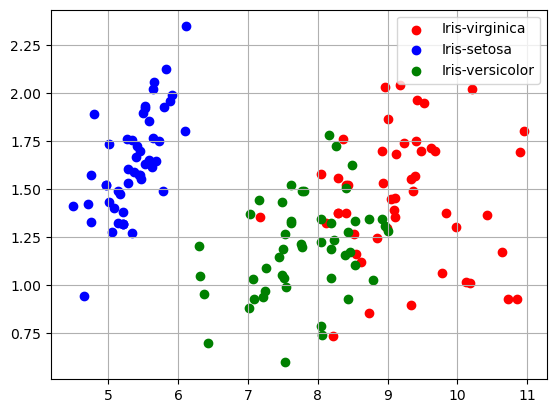

In [61]:
draw_plot(current_datasets)

In [71]:
s2

array([[5.394496031833511, 1.664087868014614],
       [5.144648815819721, 1.3228182609669579],
       [4.97431382284356, 1.5225413865716884],
       [5.00546172931682, 1.4303174499042999],
       [5.340723124597194, 1.7554780427207375],
       [5.911238592534799, 1.9869965799929954],
       [5.016036316729802, 1.7337818686867497],
       [5.3628547598032466, 1.5888067075397092],
       [4.753811649745712, 1.3305834575319428],
       [5.2153893150016835, 1.3188109601615947],
       [5.720247790289675, 1.747295965175119],
       [5.277440580536663, 1.6049157217709276],
       [5.058169685964366, 1.2774153520716585],
       [4.499293756028517, 1.410873156708368],
       [5.889273285265524, 1.9566135513879814],
       [6.109609130426593, 2.345625844213769],
       [5.660081878520697, 2.054767684762932],
       [5.406873482803811, 1.726016672121765],
       [6.100837406570925, 1.8006258107560191],
       [5.530648976253547, 1.9336667344120957],
       [5.784839832350516, 1.488817574307335],

In [72]:
s2_m = np.matrix(s2)
s3_m = np.matrix(s3)

In [74]:
def calculate_s(matrix):
    means = np.mean(matrix, axis=0)
    res = matrix - means
    return np.dot(res.T, res)

In [80]:
Sw = calculate_s(s2_m)+calculate_s(s3_m)
Sw

matrix([[30.210390003962964, 6.277680000696543],
        [6.277680000696543, 6.558843801131339]], dtype=object)

In [97]:
s2_m_mean = np.mean(s2_m, axis=0)
s3_m_mean = np.mean(s3_m, axis=0)
print(f'Wartości średnie w macierzach Setosa: {s2_m_mean}, Versicolor: {s3_m_mean}')

Wartości średnie w macierzach Setosa: [[5.353802013598783 1.634638797372408]], Versicolor: [[7.80072663740321 1.1921770788768233]]


In [114]:
Sw = Sw.astype(np.float64)
w = np.linalg.inv(Sw) * (s3_m_mean.T - s2_m_mean.T)
w = w / sqrt(np.dot(w.T, w)[0, 0]) # [0, 0] ponieważ wyciągamy ten element z obiektu np.Matrix żeby przyjęło go sqrt
w

matrix([[0.548125428214125],
        [-0.8363961471366795]], dtype=object)

In [123]:
s2_m_mean[0, 1]

1.634638797372408

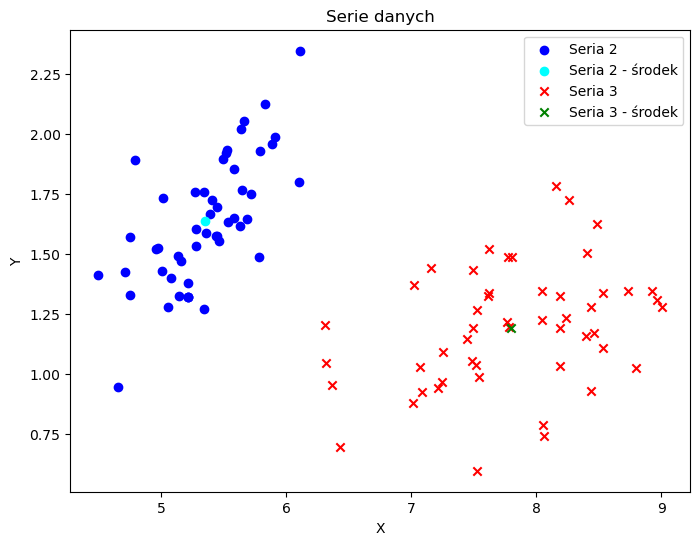

In [128]:
plt.figure(figsize=(8, 6))

plt.scatter(s2[:,[0]], s2[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean[0, 0], s2_m_mean[0, 1], label='Seria 2 - środek', color='cyan', marker='o')
plt.scatter(s3[:,[0]], s3[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean[0, 0], s3_m_mean[0, 1], label='Seria 3 - środek', color='green', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

#plt.xlim(8, 20)
#plt.ylim(-13, -1)

plt.legend()
plt.title('Serie danych')
plt.show()